In [43]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Introduction

To do:

* Run allele frequency analysis
* Run PCA (population clustering)
* Import results into Python

Assuming the data is in `hapmap1/` directory. Procedure: 
1. Run the `binary.sh` file to create binary file from the PED and MAP files, this creates BED, BIM and FAM files (plink commands)
2. Run the `freq_analysis.sh` file (plink commands)

# Create binary files

In [7]:
!./binary.sh


@----------------------------------------------------------@
|        PLINK!       |     v1.07      |   10/Aug/2009     |
|----------------------------------------------------------|
|  (C) 2009 Shaun Purcell, GNU General Public License, v2  |
|----------------------------------------------------------|
|  For documentation, citation & bug-report instructions:  |
|        http://pngu.mgh.harvard.edu/purcell/plink/        |
@----------------------------------------------------------@

Skipping web check... [ --noweb ] 
Writing this text to log file [ hapmap1/hapmap1.log ]
Analysis started: Tue Aug  6 09:55:48 2019

Options in effect:
	--file hapmap1/hapmap1
	--make-bed
	--out hapmap1/hapmap1
	--noweb

83534 (of 83534) markers to be included from [ hapmap1/hapmap1.map ]
89 individuals read from [ hapmap1/hapmap1.ped ] 
89 individuals with nonmissing phenotypes
Assuming a disease phenotype (1=unaff, 2=aff, 0=miss)
Missing phenotype value is also -9
44 cases, 45 controls and 0 missing
89 

# Summary statistics

## Minor allele frequencies

### Run plink --freq

See [this doc](http://www.cog-genomics.org/plink/2.0/basic_stats#freq) page to get more info about allele frequencies in plink. See the [doc on the .frq format](http://www.cog-genomics.org/plink/1.9/formats#frq).

Note: also possible to run a summary of allele freuquencies that is stratified by a categorical cluster variable *(like subpopulations I guess)*. 

In [8]:
!./freq_analysis.sh


@----------------------------------------------------------@
|        PLINK!       |     v1.07      |   10/Aug/2009     |
|----------------------------------------------------------|
|  (C) 2009 Shaun Purcell, GNU General Public License, v2  |
|----------------------------------------------------------|
|  For documentation, citation & bug-report instructions:  |
|        http://pngu.mgh.harvard.edu/purcell/plink/        |
@----------------------------------------------------------@

Skipping web check... [ --noweb ] 
Writing this text to log file [ hapmap1/freq_stat.log ]
Analysis started: Tue Aug  6 10:00:09 2019

Options in effect:
	--bfile hapmap1/hapmap1
	--noweb
	--freq
	--out hapmap1/freq_stat

Reading map (extended format) from [ hapmap1/hapmap1.bim ] 
83534 markers to be included from [ hapmap1/hapmap1.bim ]
Reading pedigree information from [ hapmap1/hapmap1.fam ] 
89 individuals read from [ hapmap1/hapmap1.fam ] 
89 individuals with nonmissing phenotypes
Assuming a disease 

### Visualize

This creates a `freq_stat.frq` file that looks like this:

In [11]:
!head hapmap1/freq_stat.frq
print()
!tail hapmap1/freq_stat.frq

 CHR         SNP   A1   A2          MAF  NCHROBS
   1   rs6681049    1    2       0.2135      178
   1   rs4074137    1    2      0.07865      178
   1   rs7540009    0    2            0      178
   1   rs1891905    1    2       0.4045      178
   1   rs9729550    1    2       0.1292      178
   1   rs3813196    1    2      0.02809      178
   1   rs6704013    0    2            0      174
   1    rs307347    0    2            0      154
   1   rs9439440    0    2            0      174

  22    rs131817    2    1        0.408      174
  22    rs131794    1    2       0.0618      178
  22  rs12157953    1    2     0.005618      178
  22   rs5770913    1    2       0.4773      176
  22    rs131750    1    2       0.4943      176
  22   rs2269380    1    2       0.2216      176
  22   rs6151412    0    2            0      176
  22  rs11912064    0    2            0      178
  22   rs1001469    1    2       0.3068      176
  22    rs756638    1    2       0.1307      176


Columns are:
* CHR: chromosome code
* SNP: variant identifier
* A1: allele 1 (usually minor)
* A2: allele 2 (usually major)
* MAJ: allele 1 frequency
* NCHROBS: number of allele observation

### Make a plot of allele frequencies

Use of Pandas and Matplotlib libraries in Python.

In [41]:
# use \s+ as a separator
df_freq = pd.read_csv("hapmap1/freq_stat.frq", sep="\s+")
print(df_freq.head())
print("Shape:", 
    df_freq.shape)

   CHR        SNP  A1  A2      MAF  NCHROBS
0    1  rs6681049   1   2  0.21350      178
1    1  rs4074137   1   2  0.07865      178
2    1  rs7540009   0   2  0.00000      178
3    1  rs1891905   1   2  0.40450      178
4    1  rs9729550   1   2  0.12920      178
Shape: (83534, 6)


Now we want to make a plot of minor allele frequencies. This is a **univariate distribution plot**, so we'll use [seaborn.distplot function](https://seaborn.pydata.org/generated/seaborn.distplot.html#seaborn.distplot).

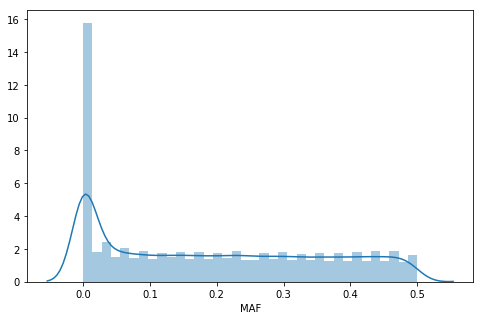

In [60]:
plt.figure(figsize=(8,5));
sns.distplot(df_freq.MAF);
plt.savefig("figures/maf_distrib.png");